# Helium-Helium Interaction Potential Comparison

## Purpose
In this notebook we compare various historical and modern approches to the He-He interaction potential demonstrating the use of the `heprops.potential` module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from heprops import potential

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

try:
    plt.style.use('notebook')
except:
    pass

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
r = np.linspace(1,10,10000)
V = {}

## Lennard-Jones

\begin{equation}
V(r) = 4\varepsilon \left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right]
\end{equation}

Parameters taken from

R. A. Aziz, A. R. Janzen, and M. R. Moldover, Phys. Rev. Lett. 74, 1586 (1995).  https://doi.org/10.1103/PhysRevLett.74.1586

In [3]:
V['Lennard-Jones'] = potential.lennard_jones

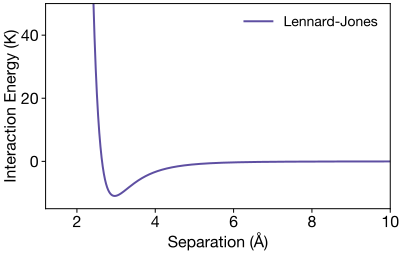

In [4]:
fig,ax = plt.subplots()
ax.plot(r,V["Lennard-Jones"](r), label='Lennard-Jones')

ax.set_xlim(1.2,10)
ax.set_ylim(-15,50)

ax.set_xlabel('Separation (Å)')
ax.set_ylabel('Interaction Energy (K)')
ax.legend();

## Aziz 1979


R. A. Aziz, V. P. S. Nain, J. S. Carley, W. L. Taylor, and G. T. McConville, J. of Chem. Phys. 70, 4330 (1979).  https://doi.org/10.1063/1.438007

\begin{equation}
V(r)= \varepsilon\left[A \exp (-\alpha x + \beta x^2)-F(x) \sum_{j=0}^{2}\frac{C_{2 j+6}}{x^{2 j+6}}\right]
\label{eq:Vaziz}
\end{equation}

where

\begin{equation}
F(x)=
\begin{cases}
\exp \left[-\left(\frac{D}{x}-1\right)^{2}\right] &,&  x<D \\
1 &,& x \geq D
\end{cases}
\end{equation}

and 

\begin{align}
\varepsilon=10.8\ \mathrm{K}, & \qquad  C_{6}=1.3732412\\
r_{m}=2.9673\ Å, &\qquad C_{8}=0.4253785\\
D = 1.241314, &\qquad C_{10}=0.1781\\
\alpha=13.353384, &\qquad  A=0.5448504 \times 10^{6} \\
\beta = 0, & \\
\end{align}

In [5]:
V['Aziz 1979'] = potential.aziz_1979

## Aziz 1987

R. A. Aziz, F. McCourt, and C. Wong, Mol. Phys. 61, 1487 (1987).  https://doi.org/10.1080/00268978700101941

\begin{align}
\varepsilon=10.948\ \mathrm{K}, & \qquad  C_{6}=1.36745214\\
r_{m}=2.963\ Å, &\qquad C_{8}=0.42123807\\
D = 1.4826, &\qquad C_{10}=0.17473318\\
\alpha=10.43329537, &\qquad  A=1.8443101 \times 10^{5} \\
\beta=-2.27965105 & \\
\end{align}

In [6]:
V['Aziz 1987'] = potential.aziz_1987

## Aziz 1995

R. A. Aziz, A. R. Janzen, and M. R. Moldover, Phys. Rev. Lett. 74, 1586 (1995).  https://doi.org/10.1103/PhysRevLett.74.1586

\begin{align}
\varepsilon=10.956\ \mathrm{K}, & \qquad  C_{6}=1.35186623\\
r_{m}=2.9683\ Å, &\qquad C_{8}=0.4149514\\
D = 1.438, &\qquad C_{10}=0.17151143\\
\alpha=10.5717543, &\qquad  A=1.86924404 \times 10^{5} \\
\beta=-2.07758779 & \\
\end{align}

In [7]:
V['Aziz 1995'] = potential.aziz_1995

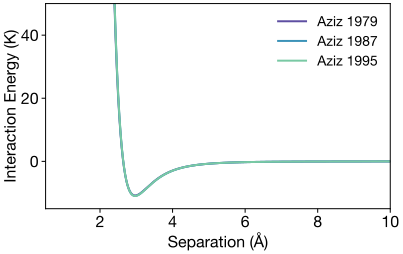

In [8]:
fig,ax = plt.subplots()

for year in [1979,1987,1995]:
    ax.plot(r,V[f'Aziz {year}'](r), label=f'Aziz {year}')

ax.set_xlim(0.5,10)
ax.set_ylim(-15,50)

ax.set_xlabel('Separation (Å)')
ax.set_ylabel('Interaction Energy (K)')
ax.legend();

## Szalewicz 2012
* M. Przybytek, W. Cencek, J. Komasa, G. Łach, B. Jeziorski, and K. Szalewicz, Phys. Rev. Lett. 104, 183003 (2010).  https://doi.org/10.1103/PhysRevLett.104.183003
* W. Cencek, M. Przybytek, J. Komasa, J. B. Mehl, B. Jeziorski, and K. Szalewicz, J. Chem. Phys. 136, 224303 (2012).  https://doi.org/10.1063/1.4712218

\begin{equation}
 V(R)= e^{-a R}\sum_{j=0}^{2}P_{j}R^j+e^{-b R}\sum_{j=0}^{1}Q_{j}R^j -\sum_{n=3}^{16} f_{n}(\eta R) \frac{C_{n}}{R^{n}}
\end{equation}

where $f_n(x)$ is the Tang-Toennies damping function:

\begin{equation}
f_{n}(x)=1-e^{-x} \sum_{k=0}^{n} \frac{x^{k}}{k !}
\end{equation}

### Parameters
| Parameter | Value | Parameter| Value |
|-----------|-------|----------|-------|
|$C_0$|0.0|$a$ | 3.64890303652830|
|$C_1$|0.0|$b$|2.36824871743591|
|$C_2$|0.0| η | 4.09423805117871|
|$C_3$|0.000000577235|$P_0$ | -25.4701669416621|
|$C_4$|-0.000035322| $P_1$ | 269.244425630616 |
|$C_5$|0.000001377841|$P_2$ | -56.3879970402079|
|$C_6$|1.461830|$Q_0$ | 38.7957487310071 |
|$C_7$|0.0|$Q_1$ | -2.76577136772754|
|$C_8$|14.12350|||
|$C_9$|0.0|||
|$C_{10}$|183.7497|||
|$C_{11}$|-0.7674e2|||
|$C_{12}$|0.3372e4|||
|$C_{13}$|-0.3806e4|||
|$C_{14}$|0.8534e5|||
|$C_{15}$|-0.1707e6|||
|$C_{16}$|0.286e7|||

### Conversion Factors
Factors of 315774.65 from atomic units to kelvins and of 0.52917720859 from bohrs to angstroms were assumed.

In [9]:
V['Szalewicz 2012'] = potential.szalewicz_2012

## Plot a comparison of all the potentials

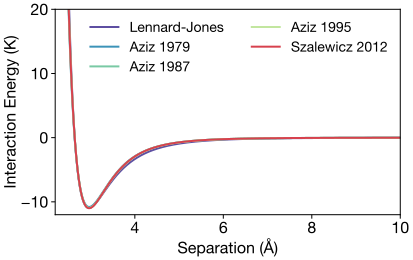

In [14]:
fig,ax = plt.subplots()
ax.plot(r,V["Lennard-Jones"](r), label='Lennard-Jones')
ax.plot(r,V["Aziz 1979"](r), label='Aziz 1979')
ax.plot(r,V["Aziz 1987"](r), label='Aziz 1987')
ax.plot(r,V["Aziz 1995"](r), label='Aziz 1995')
ax.plot(r,V["Szalewicz 2012"](r), color=colors[-2],label='Szalewicz 2012')

ax.set_xlim(2.2,10)
ax.set_ylim(-12,20)

ax.set_xlabel('Separation (Å)')
ax.set_ylabel('Interaction Energy (K)')
ax.legend(ncol=2);
plt.savefig('potential_comparison.svg')

### Check the differences with Szalewicz

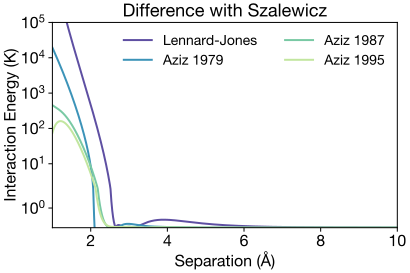

In [11]:
fig,ax = plt.subplots()
ax.plot(r,np.abs(V["Lennard-Jones"](r)-V["Szalewicz 2012"](r)), label='Lennard-Jones')

ax.plot(r,(V["Aziz 1979"](r)-V["Szalewicz 2012"](r)), label='Aziz 1979')
ax.plot(r,np.abs(V["Aziz 1987"](r)-V["Szalewicz 2012"](r)), label='Aziz 1987')
ax.plot(r,np.abs(V["Aziz 1995"](r)-V["Szalewicz 2012"](r)), label='Aziz 1995')


ax.set_yscale('symlog')

ax.set_xlim(1.0,10)
ax.set_ylim(1E-8,1E5)

ax.set_xlabel('Separation (Å)')
ax.set_ylabel('Interaction Energy (K)')
ax.legend(ncol=2, loc='upper right')
ax.set_title('Difference with Szalewicz');

#### Now for r → 0 where there are some numerical instabilities

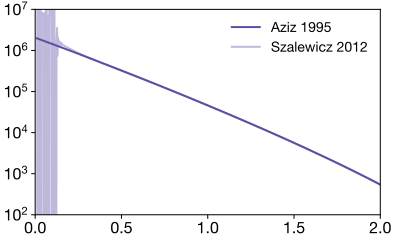

In [12]:
tr = np.linspace(0.01,3,1000)
fig,ax = plt.subplots()
ax.plot(tr,V["Aziz 1995"](tr), label='Aziz 1995')
ax.plot(tr,V["Szalewicz 2012"](tr), color=colors[0], label='Szalewicz 2012', alpha=0.4)
ax.set_yscale('symlog')
ax.set_xlim(0,2)
ax.set_ylim(1E2,1E7)
ax.legend()